In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/Users/aryagupta/Desktop/food-delivery-estimation/food_time_prediction_using_mlops/data/raw/train.csv"

data = pd.read_csv(path)
data = data.drop([45593], axis = 0) # contains all numm value

In [34]:
pd.set_option('display.max_columns', None)

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2.0,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2.0,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0.0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0.0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1.0,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
data = data.rename({"Delivery_person_ID": "person_id", 
             "Delivery_person_Age" : "age", 
             "Delivery_person_Ratings" : "ratings",
            "Delivery_location_latitude": "delivery_latitude",
             "Delivery_location_longitude" : "delivery_longitude",
             "Time_Order_picked" : "order_picked",
             "Weatherconditions" : "weather",
             "Road_traffic_density" : "traffic", 
             "Type_of_order" : "order_type",
             "Time_taken(min)" : "time"
            }, axis = 1)

data.columns = data.columns.str.lower()

In [5]:
print(f"There are {data.shape[0]} rows and {data.shape[1]} Columns in the dataset ")

There are 45593 rows and 20 Columns in the dataset 


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45593 non-null  object 
 1   person_id             45593 non-null  object 
 2   age                   45593 non-null  object 
 3   ratings               45593 non-null  object 
 4   restaurant_latitude   45593 non-null  float64
 5   restaurant_longitude  45593 non-null  float64
 6   delivery_latitude     45593 non-null  float64
 7   delivery_longitude    45593 non-null  float64
 8   order_date            45593 non-null  object 
 9   time_orderd           45593 non-null  object 
 10  order_picked          45593 non-null  object 
 11  weather               45593 non-null  object 
 12  traffic               45593 non-null  object 
 13  vehicle_condition     45593 non-null  float64
 14  order_type            45593 non-null  object 
 15  type_of_vehicle    

In [7]:
data.dtypes

id                       object
person_id                object
age                      object
ratings                  object
restaurant_latitude     float64
restaurant_longitude    float64
delivery_latitude       float64
delivery_longitude      float64
order_date               object
time_orderd              object
order_picked             object
weather                  object
traffic                  object
vehicle_condition       float64
order_type               object
type_of_vehicle          object
multiple_deliveries      object
festival                 object
city                     object
time                     object
dtype: object

### Key Observations
0. We can see prelimary that there are no Null values but we need to confirm this later.
1. `ID` column need to be dropped as it is not useful for prediction
2. `person_id` feature contains city name in the values so we need to extract the names
3. `age` feature has numerical values but data type is object so we need to change that.
4. `ratings` feature has float values but the data type is object which needs correction.
5. `order_date`, `time_orderd` and `order_picked` must be in datetime dtype and contains information about date, day, month etc.
6. `weather` features needs cleaning as we need to remove condition words in each value.
7. `multiple_deliveries` features needs to in int dtype.
8. `time` feature must be in int and we must remove (min) word from each cell.

In [8]:
data.describe()

,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359
std,8.185109,22.883647,7.335122,21.118812,0.839065
min,-30.905562,-88.366217,0.010000,0.010000,0.000000
25%,12.933284,73.170000,12.988453,73.280000,0.000000
50%,18.546947,75.898497,18.633934,76.002574,1.000000
75%,22.728163,78.044095,22.785049,78.107044,2.000000
max,30.914057,88.433452,31.054057,88.563452,3.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    45593 non-null  object 
 1   person_id             45593 non-null  object 
 2   age                   45593 non-null  object 
 3   ratings               45593 non-null  object 
 4   restaurant_latitude   45593 non-null  float64
 5   restaurant_longitude  45593 non-null  float64
 6   delivery_latitude     45593 non-null  float64
 7   delivery_longitude    45593 non-null  float64
 8   order_date            45593 non-null  object 
 9   time_orderd           45593 non-null  object 
 10  order_picked          45593 non-null  object 
 11  weather               45593 non-null  object 
 12  traffic               45593 non-null  object 
 13  vehicle_condition     45593 non-null  float64
 14  order_type            45593 non-null  object 
 15  type_of_vehicle    

### Correcting data types

In [10]:
def clean_data_types(data):

    # ID Feature
    data['id'] = data['id'].replace("NaN", np.nan)

    # person_id
    data['person_id'] = data['person_id'].replace("NaN", np.nan)

    # age
    data['age'] = data['age'].replace("NaN", np.nan)
    data['age'] = data['age'].astype('float').round()
    
    # ratings
    data['ratings'] = data['ratings'].replace("NaN", np.nan)
    data['ratings'] = data['ratings'].astype('float')

    # restaurant_latitude
    data['restaurant_latitude'] = data['restaurant_latitude'].replace("NaN", np.nan)

    # restaurant_longitude
    data['restaurant_longitude'] = data['restaurant_longitude'].replace("NaN", np.nan)

    # delivery_latitude
    data['delivery_latitude'] = data['delivery_latitude'].replace("NaN", np.nan)

    # delivery_longitude
    data['delivery_longitude'] = data['delivery_longitude'].replace("NaN", np.nan)

    # order_date
    data['order_date'] = pd.to_datetime(data['order_date'])

    # time_ordered
    data['time_orderd'] = data['time_orderd'].replace("NaN", np.nan)
    data['time_orderd'] = pd.to_datetime(data['time_orderd'], errors='coerce')

    # order_picked
    data['order_picked'] = pd.to_datetime(data['order_picked'])

    # weather
    data['weather'] = data['weather'].replace("NaN", np.nan)

    # traffic
    data['traffic'] = data['traffic'].replace("NaN ", np.nan)

    # vehical_condition
    data['vehicle_condition'] = data['vehicle_condition'].replace("NaN", np.nan)
    data['vehicle_condition'] = data['vehicle_condition'].astype('Int64')

    # order_type
    data['order_type'] = data['order_type'].replace("NaN ", np.nan)

    # type_of_vehicle
    data['type_of_vehicle'] = data['type_of_vehicle'].replace("NaN ", np.nan)

    # multiple_deliveries
    data['multiple_deliveries'] = data['multiple_deliveries'].replace("NaN ", np.nan)
    data['multiple_deliveries'] = data['multiple_deliveries'].astype('float')

    # festival
    data['festival'] = data['festival'].replace("NaN ", np.nan)

    # city
    data['city'] = data['city'].replace("NaN ", np.nan)

    # time
    data['time'] = data['time'].str.replace(r"\(min\) ", "", regex=True)
    data['time'] = data['time'].astype('int')

    return data

clean_data_types(data)

/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_74404/1538457133.py:30: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['order_date'] = pd.to_datetime(data['order_date'])
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_74404/1538457133.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['time_orderd'] = pd.to_datetime(data['time_orderd'], errors='coerce')
/var/folders/vr/nc9jvld12q115x_g_114k8g40000gn/T/ipykernel_74404/1538457133.py:37: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['order_picked'] = pd.to_datetime(data['order_picked'])


,id,person_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time
0,0x4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-05-11 11:30:00,2025-05-11 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0.0,No,Urban,24
1,0xb379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-05-11 19:45:00,2025-05-11 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1.0,No,Metropolitian,33
2,0x5d6d,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2025-05-11 08:30:00,2025-05-11 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Urban,26
3,0x7a6a,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,2025-05-11 18:00:00,2025-05-11 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1.0,No,Metropolitian,21
4,0x70a2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,2025-05-11 13:30:00,2025-05-11 13:45:00,conditions Cloudy,High,1,Snack,scooter,1.0,No,Metropolitian,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,2025-05-11 11:35:00,2025-05-11 11:45:00,conditions Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45589,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,2025-05-11 19:55:00,2025-05-11 20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45590,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,2025-05-11 23:50:00,2025-05-11 00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45591,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,2025-05-11 13:35:00,2025-05-11 13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


Missing Values after cleaning

In [11]:
data.isna().sum()

id                         0
person_id                  0
age                     1854
ratings                 1908
restaurant_latitude        0
restaurant_longitude       0
delivery_latitude          0
delivery_longitude         0
order_date                 0
time_orderd             1731
order_picked               0
weather                    0
traffic                  601
vehicle_condition          0
order_type                 0
type_of_vehicle            0
multiple_deliveries      993
festival                 228
city                    1200
time                       0
dtype: int64

In [12]:
print(f'There are {data.isna().sum().sum()} null values in the dataset')

There are 8515 null values in the dataset


<Axes: >

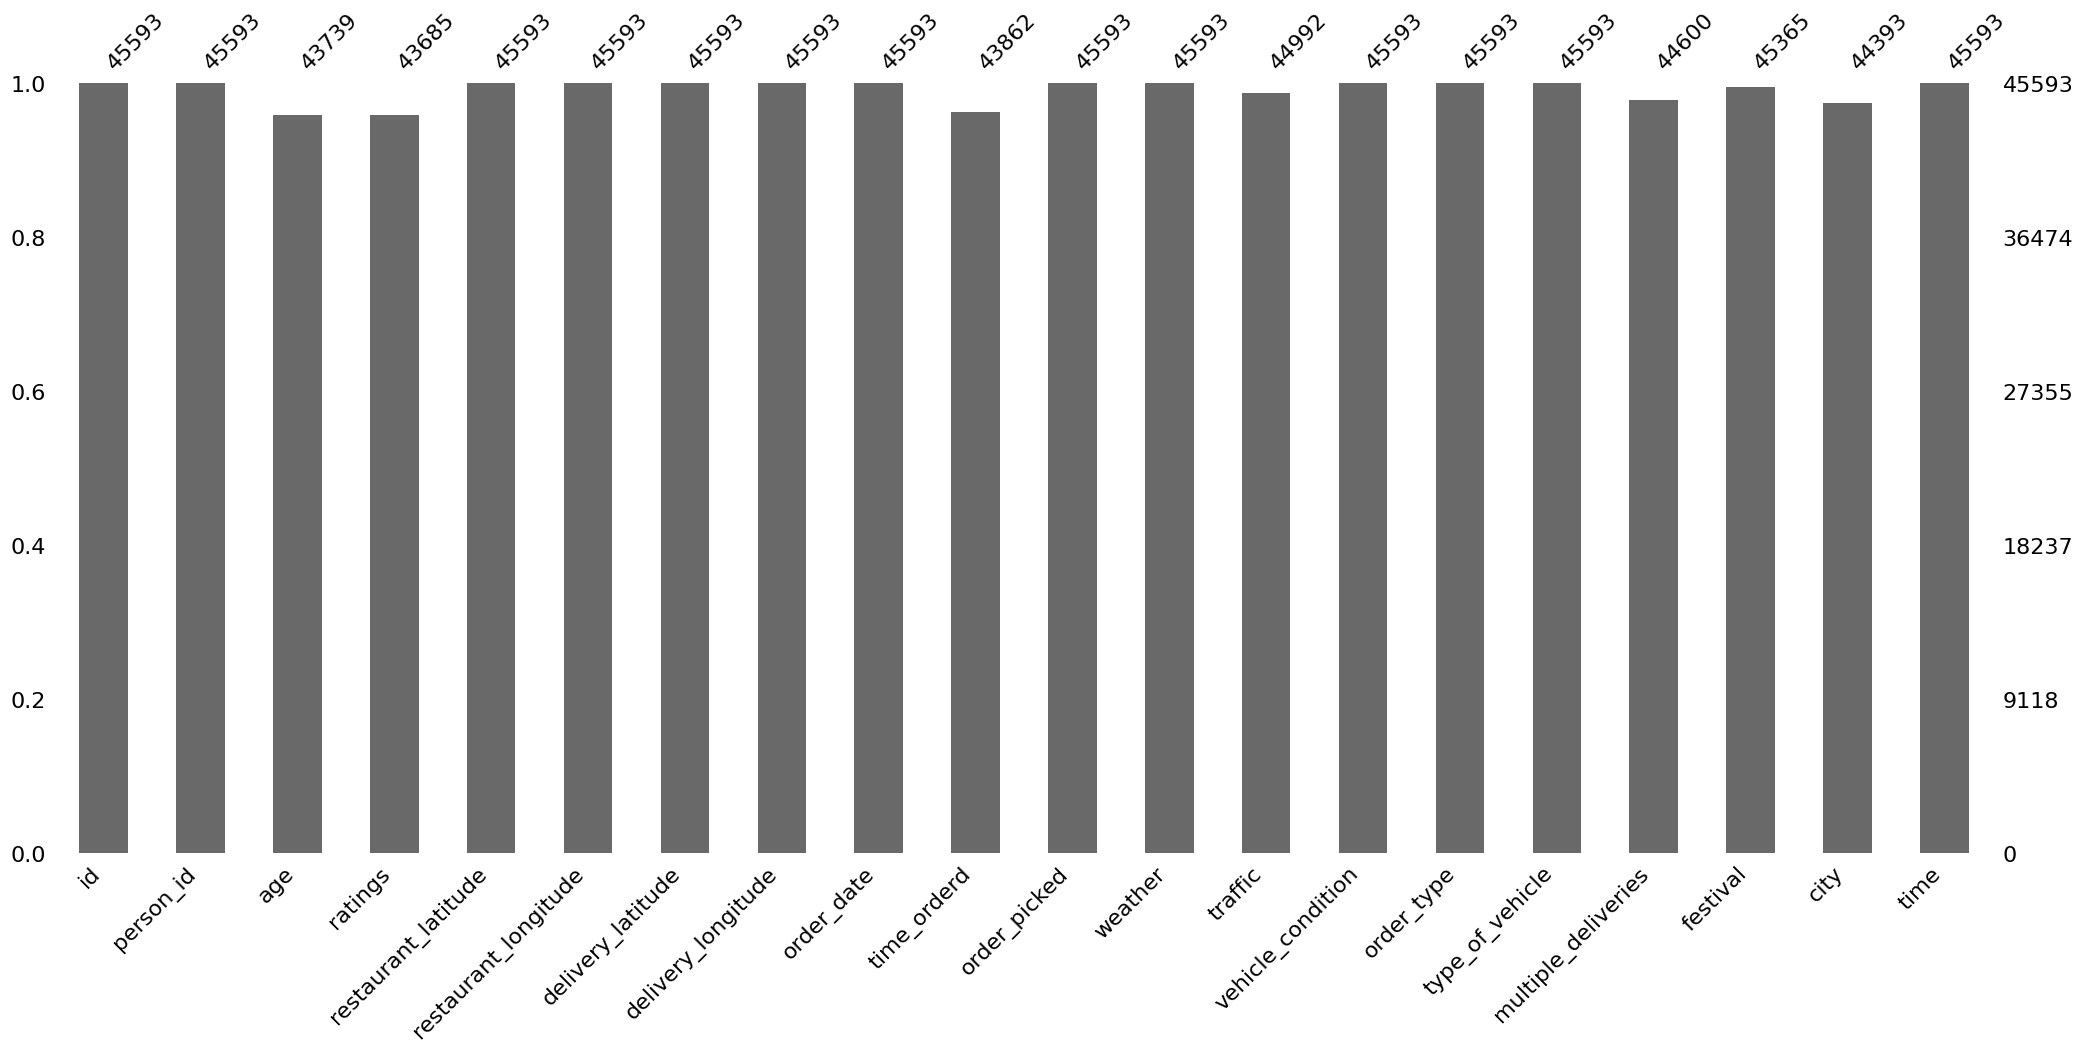

In [13]:
msno.bar(data)

<Axes: >

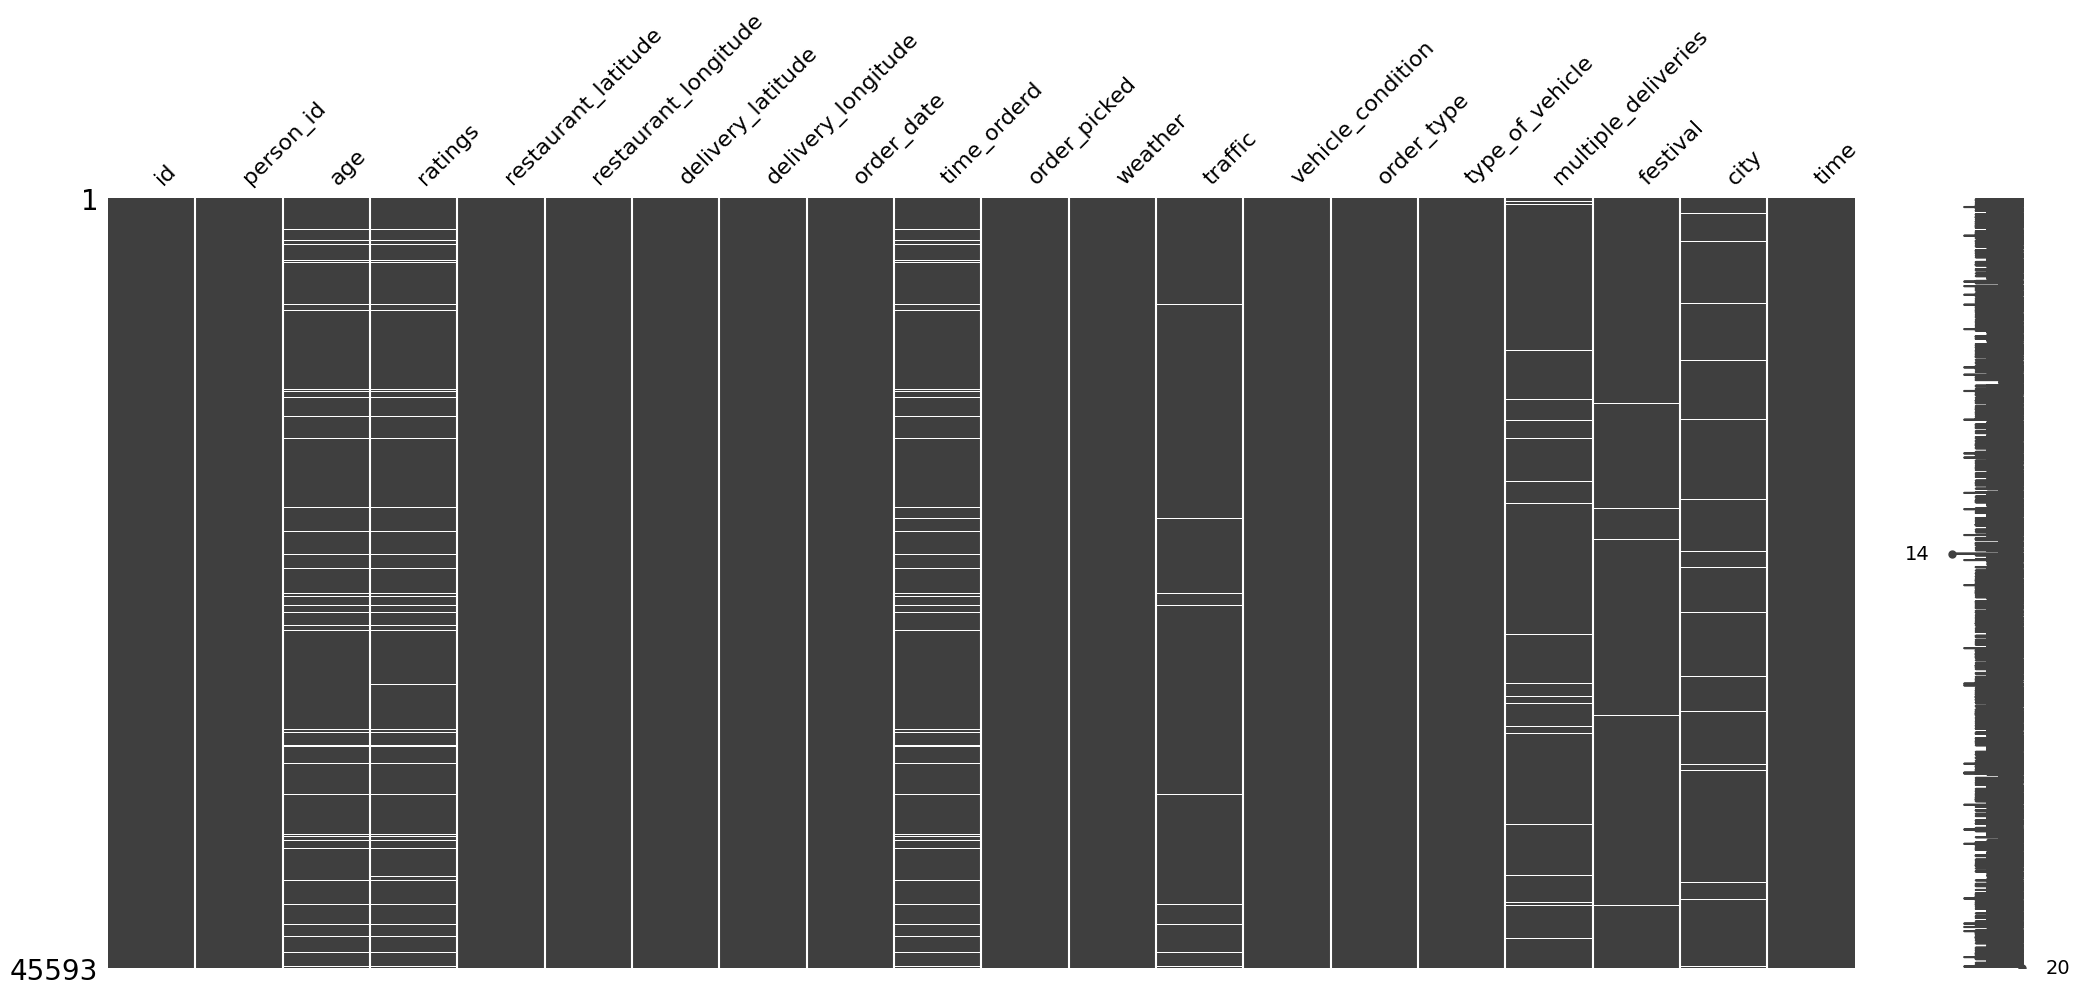

In [14]:
msno.matrix(data)

In [15]:
data.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,vehicle_condition,multiple_deliveries,time
count,43739.000000,43685.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593,43862,45593,45593.0,44600.000000,45593.000000
mean,29.567137,4.633780,17.017729,70.231332,17.465186,70.845702,2022-03-13 16:32:53.987235072,2025-05-11 17:54:59.856367872,2025-05-11 17:37:17.389511424,1.023359,0.744664,26.294607
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,2022-02-11 00:00:00,2025-05-11 00:00:00,2025-05-11 00:00:00,0.0,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,2022-03-04 00:00:00,2025-05-11 15:25:00,2025-05-11 14:35:00,0.0,0.000000,19.000000
50%,30.000000,4.700000,18.546947,75.898497,18.633934,76.002574,2022-03-15 00:00:00,2025-05-11 19:15:00,2025-05-11 19:10:00,1.0,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2022-03-27 00:00:00,2025-05-11 21:35:00,2025-05-11 21:35:00,2.0,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,2025-05-11 23:55:00,2025-05-11 23:55:00,3.0,3.000000,54.000000
std,5.815155,0.334716,8.185109,22.883647,7.335122,21.118812,NaN,NaN,NaN,0.839065,0.572473,9.383806


### Key Observations:
1. The min age in the `age` feature is 15 which is illegal hence we need to investigate this further.
2. `rating` feature has max value as 6 which is not possible because scale is upto 5.
3. `restaurant_latitude` has min value in negative which is not possible for India and same for other locations as well.

### Missing Value Analysis

In [16]:
data[data['age'] == 15]

,id,person_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time
2387,0x564,JAPRES15DEL03,15.0,1.0,-26.891191,75.802083,26.981191,75.892083,2022-03-12,NaT,2025-05-11 17:20:00,conditions NaN,NaN,3,Meal,motorcycle,0.0,No,Urban,15
2905,0xcd0,INDORES010DEL03,15.0,1.0,22.750040,75.902847,22.810040,75.962847,2022-04-03,NaT,2025-05-11 20:30:00,conditions NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,29
2951,0x91a,SURRES17DEL03,15.0,1.0,21.149569,72.772697,21.209569,72.832697,2022-03-21,NaT,2025-05-11 22:10:00,conditions NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,20
5902,0x474,CHENRES15DEL03,15.0,1.0,13.026286,80.275235,13.056286,80.305235,2022-03-11,NaT,2025-05-11 20:50:00,conditions NaN,NaN,3,Drinks,bicycle,1.0,No,Metropolitian,25
9156,0x73f,BANGRES05DEL01,15.0,1.0,12.970324,77.645748,13.080324,77.755748,2022-03-25,NaT,2025-05-11 23:25:00,conditions NaN,NaN,3,Buffet,motorcycle,2.0,No,Metropolitian,34
10900,0x1b49,MUMRES14DEL02,15.0,1.0,19.181300,72.836191,19.231300,72.886191,2022-03-30,NaT,2025-05-11 20:55:00,conditions NaN,NaN,3,Buffet,motorcycle,1.0,No,Metropolitian,39
11125,0x40b,SURRES12DEL01,15.0,1.0,-21.183434,-72.814492,21.193434,72.824492,2022-03-05,NaT,2025-05-11 11:30:00,conditions NaN,NaN,3,Meal,scooter,1.0,No,Urban,27
12093,0x523,INDORES03DEL02,15.0,1.0,22.751857,75.866699,22.801857,75.916699,2022-03-24,NaT,2025-05-11 21:15:00,conditions NaN,NaN,3,Buffet,bicycle,0.0,No,Metropolitian,28
15124,0x18b0,RANCHIRES02DEL01,15.0,1.0,0.000000,0.000000,0.070000,0.070000,2022-03-16,NaT,2025-05-11 23:55:00,conditions NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,21
15927,0x550,CHENRES08DEL02,15.0,1.0,13.022394,80.242439,13.072394,80.292439,2022-03-11,NaT,2025-05-11 18:10:00,conditions NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,17


### Observations:
1. All the points which have `age` = 15 have many multiple missing values simultaneously.
2. It can also be seen that 15 age child is driving scooter which is illegal hence we must drop it to make out data more accurate.

In [17]:
(data['age'] < 18).sum()

np.int64(38)

We need to remove this subset of data from our original dataset because this is not a true representation of our distribution of our data

In [18]:
data = data.drop(data[data['age'] < 18].index)

### Rating > 5

In [19]:
data['ratings'].value_counts().loc[6.0]

np.int64(53)

So there are 53 values with rating = 6. This can be data entry issue and we need to investigate this further.

In [20]:
data[data['ratings'] > 5]

,id,person_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time
3586,0x46d,BANGRES05DEL01,50.0,6.0,-12.970324,-77.645748,13.010324,77.685748,2022-03-13,NaT,2025-05-11 12:30:00,conditions NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,25
4714,0x493,HYDRES17DEL01,50.0,6.0,-17.451976,-78.385883,17.561976,78.495883,2022-04-04,NaT,2025-05-11 23:20:00,conditions NaN,NaN,3,Snack,bicycle,0.0,No,Metropolitian,27
5169,0x4f2,JAPRES08DEL01,50.0,6.0,-26.910262,-75.783013,27.020262,75.893013,2022-03-18,NaT,2025-05-11 18:50:00,conditions NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
5362,0x430,BANGRES19DEL01,50.0,6.0,12.914264,77.678400,13.024264,77.788400,2022-04-06,NaT,2025-05-11 20:55:00,conditions NaN,NaN,3,Meal,electric_scooter,1.0,No,Metropolitian,18
5651,0xbef1,AGRRES13DEL02,50.0,6.0,-27.159795,-78.042990,27.209795,78.092990,2022-02-13,NaT,2025-05-11 18:05:00,conditions NaN,NaN,3,Drinks,scooter,1.0,No,Metropolitian,20
6394,0x427,JAPRES06DEL02,50.0,6.0,26.911927,75.797282,27.041927,75.927282,2022-04-02,NaT,2025-05-11 22:10:00,conditions NaN,NaN,3,Meal,electric_scooter,0.0,No,Urban,20
7031,0x3eb,MYSRES15DEL02,50.0,6.0,-12.352058,-76.606650,12.372058,76.626650,2022-03-15,NaT,2025-05-11 10:00:00,conditions NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,14
7681,0xd42,VADRES09DEL01,50.0,6.0,0.000000,0.000000,0.010000,0.010000,2022-03-21,NaT,2025-05-11 08:35:00,conditions NaN,NaN,3,Meal,bicycle,1.0,No,Metropolitian,22
9499,0x3f0,BANGRES010DEL01,50.0,6.0,12.933298,77.614293,13.003298,77.684293,2022-03-12,NaT,2025-05-11 18:25:00,conditions NaN,NaN,3,Drinks,scooter,1.0,No,Urban,17
9535,0x3ef,RANCHIRES13DEL01,50.0,6.0,-23.374989,-85.335486,23.444989,85.405486,2022-03-20,NaT,2025-05-11 17:55:00,conditions NaN,NaN,3,Snack,bicycle,1.0,No,Metropolitian,32


### Key Observations:
1. We can see that all those entries with rating > 5 have age = 50 which raises suspicion.
2. Since India lies in Northern Hemisphere we cannot have negative latitude and similarly we lie on East side of meridian therefore we cannot have negative longitudes as well.
3. We can also see that the `time_order` is missing in all the datapoints which is crucial metric and cant be imputed correctly.
4. There is also inconssitency between `order_picked` and `order_date` as some `order_picked` have 2025 values but `order_date` is 2022.
5. `traffic` is also unavailable and all the values are missing in this feature as well.

**After considering all these Observations I choose to remove these datapoints from our data as they are altering the data distribution in wrong way**.

In [21]:
data = data.drop(data[data['ratings'] > 5].index)

### Geo Coordinates Cleaning

#### restaurant_latitude feature

In [22]:
data['restaurant_latitude'].describe()

count    45502.000000
mean        17.046293
std          8.131457
min        -30.905562
25%         12.933284
50%         18.551440
75%         22.728163
max         30.914057
Name: restaurant_latitude, dtype: float64

We need to check those values which are nan or less than 0.

In [23]:
data['restaurant_latitude'].isna().sum()

np.int64(0)

In [24]:
data[data['restaurant_latitude'] < 0]

,id,person_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time
92,0xc042,AGRRES010DEL01,34.0,4.7,-27.163303,78.057044,27.233303,78.127044,2022-02-16,2025-05-11 23:00:00,2025-05-11 23:05:00,conditions Sandstorms,Low,1,Drinks,scooter,0.0,No,Metropolitian,15
283,0xc044,AGRRES12DEL03,32.0,4.7,-27.165108,78.015053,27.225108,78.075053,2022-02-13,2025-05-11 20:55:00,2025-05-11 21:10:00,conditions Sandstorms,Jam,2,Meal,scooter,1.0,No,Metropolitian,31
289,0x4db,PUNERES02DEL03,NaN,NaN,-18.551440,-73.804855,18.611440,73.864855,2022-03-05,NaT,2025-05-11 22:05:00,conditions Stormy,Jam,2,Meal,scooter,0.0,No,Urban,12
425,0xc003,DEHRES13DEL02,NaN,NaN,-30.366322,-78.070453,30.496322,78.200453,2022-02-18,NaT,2025-05-11 22:30:00,conditions NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,20
534,0x473,MYSRES07DEL03,NaN,NaN,-12.325461,-76.632278,12.385461,76.692278,2022-03-03,NaT,2025-05-11 22:45:00,conditions NaN,NaN,3,Buffet,scooter,NaN,No,Metropolitian,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44933,0xc0c2,AURGRES03DEL03,30.0,4.9,-19.874733,75.353942,19.904733,75.383942,2022-02-15,2025-05-11 22:20:00,2025-05-11 22:35:00,conditions Fog,Low,1,Buffet,motorcycle,0.0,No,Metropolitian,15
45020,0x56b,PUNERES04DEL01,NaN,NaN,-18.514210,73.838429,18.524210,73.848429,2022-03-21,NaT,2025-05-11 12:05:00,conditions NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,30
45108,0xc01b,GOARES18DEL01,NaN,NaN,-15.493950,-73.827423,15.563950,73.897423,2022-02-16,NaT,2025-05-11 22:05:00,conditions Windy,Jam,2,Meal,scooter,1.0,No,Urban,19
45182,0xc0c7,KNPRES16DEL02,30.0,4.0,-26.482581,80.315628,26.532581,80.365628,2022-02-17,2025-05-11 22:25:00,2025-05-11 22:40:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,34


### Key Observations:
1. On careful observations by random sampling I get to understand that all those negative cooredinates make sense if considered positive as I have checked thier location on GPS and they refer to same city that is mentioned in `person_id` feature

In [25]:
data.loc[data['restaurant_latitude'] < 0, 'restaurant_latitude'] = data.loc[data['restaurant_latitude'] < 0, 'restaurant_latitude'].abs()

#### restaurant_longitude

In [26]:
data[data['restaurant_longitude'] < 0].isna().sum()

id                        0
person_id                 0
age                     135
ratings                 135
restaurant_latitude       0
restaurant_longitude      0
delivery_latitude         0
delivery_longitude        0
order_date                0
time_orderd             135
order_picked              0
weather                   0
traffic                  86
vehicle_condition         0
order_type                0
type_of_vehicle           0
multiple_deliveries       3
festival                  0
city                      7
time                      0
dtype: int64

In [27]:
data[data['restaurant_longitude'] < 0].sample(50)

,id,person_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time
3397,0x494,MYSRES01DEL01,NaN,NaN,12.311072,-76.654878,12.321072,76.664878,2022-03-01,NaT,2025-05-11 10:05:00,conditions NaN,NaN,3,Meal,scooter,0.0,No,Metropolitian,24
33989,0x458,BANGRES20DEL01,NaN,NaN,12.972161,-77.596014,13.042161,77.666014,2022-04-02,NaT,2025-05-11 18:40:00,conditions NaN,NaN,3,Meal,scooter,0.0,No,Urban,25
38172,0x4d3,MYSRES16DEL01,NaN,NaN,12.316967,-76.603067,12.326967,76.613067,2022-03-21,NaT,2025-05-11 10:40:00,conditions NaN,NaN,3,Buffet,scooter,0.0,No,Metropolitian,21
20156,0x488,INDORES17DEL02,NaN,NaN,22.761226,-75.887522,22.841226,75.967522,2022-03-18,NaT,2025-05-11 19:20:00,conditions NaN,NaN,1,Meal,scooter,1.0,No,Metropolitian,43
1286,0xbf0a,AGRRES07DEL02,NaN,NaN,27.160934,-78.044095,27.180934,78.064095,2022-02-13,NaT,2025-05-11 09:30:00,conditions NaN,Low,1,Drinks,motorcycle,1.0,No,Urban,29
30633,0x481,RANCHIRES06DEL03,NaN,NaN,23.357804,-85.325146,23.417804,85.385146,2022-04-05,NaT,2025-05-11 19:55:00,conditions NaN,NaN,3,Buffet,electric_scooter,0.0,No,Metropolitian,29
26592,0xc008,DEHRES07DEL01,NaN,NaN,30.362686,-78.068890,30.372686,78.078890,2022-02-11,NaT,2025-05-11 09:45:00,conditions Sunny,Low,0,Meal,motorcycle,1.0,No,Metropolitian,12
23418,0x4d4,MYSRES01DEL02,NaN,NaN,12.311072,-76.654878,12.361072,76.704878,2022-04-01,NaT,2025-05-11 21:20:00,conditions NaN,NaN,1,Buffet,motorcycle,1.0,No,Metropolitian,20
33860,0x43a,JAPRES010DEL01,NaN,NaN,26.921411,-75.793604,26.991411,75.863604,2022-03-08,NaT,2025-05-11 00:00:00,conditions NaN,NaN,3,Buffet,scooter,1.0,No,Metropolitian,20
14391,0x4b0,HYDRES18DEL02,NaN,NaN,17.450851,-78.379347,17.500851,78.429347,2022-03-21,NaT,2025-05-11 21:15:00,conditions Sandstorms,Jam,2,Buffet,scooter,1.0,No,Metropolitian,25


### Key Observations:
1. All those datapoints that have negative longitude also have null values in multiple features like `age`, `ratings`, `time_ordered`, `weather` and most values in `traffic`

**Hence I choose to remove these rows**

In [28]:
data = data[~(data['restaurant_longitude'] < 0)]

### Date Features

In [29]:
data['time_orderd']

0       2025-05-11 11:30:00
1       2025-05-11 19:45:00
2       2025-05-11 08:30:00
3       2025-05-11 18:00:00
4       2025-05-11 13:30:00
                ...        
45588   2025-05-11 11:35:00
45589   2025-05-11 19:55:00
45590   2025-05-11 23:50:00
45591   2025-05-11 13:35:00
45592   2025-05-11 17:10:00
Name: time_orderd, Length: 45367, dtype: datetime64[ns]

In [32]:
data['order_date_from_time_ordered'] = data['time_orderd'].dt.date
data['order_time_from_time_ordered'] = data['time_orderd'].dt.time

In [37]:
data['order_pick_date_from_order_picked'] = data['order_picked'].dt.date
data['order_pick_time_from_order_picked'] = data['order_picked'].dt.time

In [39]:
data.drop(['time_orderd', 'order_picked'], axis = 1, inplace = True)

I need to check that are the dates consistent so `order_date_from_time_ordered` must be same as `order_pick_date_from_order_picked`

In [44]:
data['order_date_from_time_ordered'].isna().sum()

np.int64(1505)

In [49]:
data[(data['order_date_from_time_ordered'] != data['order_pick_date_from_order_picked'])]

,id,person_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time,order_date_from_time_ordered,order_time_from_time_ordered,order_pick_date_from_order_picked,order_pick_time_from_order_picked
42,0x4f0,MUMRES17DEL02,NaN,NaN,19.121999,72.908493,19.201999,72.988493,2022-04-06,conditions Cloudy,Medium,1,Drinks,scooter,1.0,No,Metropolitian,33,NaT,NaT,2025-05-11,18:35:00
74,0xa9f,BANGRES13DEL01,NaN,NaN,12.935662,77.614130,12.975662,77.654130,2022-03-11,conditions NaN,NaN,1,Drinks,scooter,0.0,No,Metropolitian,19,NaT,NaT,2025-05-11,15:30:00
120,0x6e2,VADRES06DEL01,NaN,NaN,22.312790,73.170283,22.422790,73.280283,2022-04-02,conditions NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25,NaT,NaT,2025-05-11,18:25:00
140,0x1ec7,PUNERES05DEL03,NaN,NaN,18.543626,73.905101,18.573626,73.935101,2022-03-09,conditions Stormy,Low,2,Snack,scooter,0.0,No,NaN,19,NaT,NaT,2025-05-11,23:40:00
179,0x1b58,JAPRES03DEL01,NaN,NaN,26.913483,75.803139,26.983483,75.873139,2022-03-12,conditions Sandstorms,Medium,0,Drinks,motorcycle,0.0,No,Metropolitian,43,NaT,NaT,2025-05-11,17:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45394,0xdc4,RANCHIRES02DEL03,NaN,NaN,0.000000,0.000000,0.030000,0.030000,2022-03-05,conditions NaN,NaN,3,Buffet,bicycle,1.0,No,Metropolitian,21,NaT,NaT,2025-05-11,17:25:00
45405,0xc7ed,KNPRES20DEL03,NaN,NaN,26.470000,80.350000,26.610000,80.490000,2022-02-12,conditions Windy,Jam,1,Drinks,scooter,1.0,No,Metropolitian,18,NaT,NaT,2025-05-11,19:25:00
45518,0x863,INDORES05DEL01,NaN,NaN,22.727021,75.884167,22.737021,75.894167,2022-03-19,conditions NaN,NaN,3,Snack,electric_scooter,0.0,No,Metropolitian,25,NaT,NaT,2025-05-11,11:40:00
45519,0xd0be,AGRRES07DEL01,NaN,NaN,27.160934,78.044095,27.170934,78.054095,2022-02-13,conditions NaN,NaN,3,Meal,electric_scooter,1.0,No,Urban,17,NaT,NaT,2025-05-11,09:05:00


### Key Observations:
1. We can clearly see that those missisng values in `order_date_from_time_ordered` are same as `order_pick_date_from_order_picked` hence we can safely drop `order_date_from_time_ordered`.

In [50]:
data.drop("order_date_from_time_ordered", axis = 1, inplace = True)

### cleaning person_id feature

In [53]:
# Extract city name as substring before 'RES'
data['city'] = data['person_id'].str.extract(r'^(.*?)RES')

In [55]:
data.drop(["person_id", "id"], axis = 1, inplace = True)

### weather feature cleaning

In [58]:
data['weather'] = data['weather'].str.replace("conditions ", "")

In [61]:
data['weather'] = data['weather'].replace("NaN", np.nan)

In [64]:
data[data['order_date'] == data['order_pick_date_from_order_picked']]

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time,order_time_from_time_ordered,order_pick_date_from_order_picked,order_pick_time_from_order_picked


In [62]:
data.sample(50)

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,vehicle_condition,order_type,type_of_vehicle,multiple_deliveries,festival,city,time,order_time_from_time_ordered,order_pick_date_from_order_picked,order_pick_time_from_order_picked
27642,20.0,4.8,23.374878,85.335739,23.424878,85.385739,2022-04-01,Sunny,Jam,2,Meal,motorcycle,0.0,NaN,RANCHI,10,20:15:00,2025-05-11,20:20:00
18497,22.0,5.0,11.016298,76.972076,11.066298,77.022076,2022-03-30,Cloudy,Jam,0,Snack,motorcycle,1.0,No,COIMB,25,21:40:00,2025-05-11,21:50:00
9888,21.0,4.5,21.149569,72.772697,21.279569,72.902697,2022-03-12,Sandstorms,Medium,1,Buffet,motorcycle,0.0,No,SUR,24,18:40:00,2025-05-11,18:50:00
18792,27.0,4.7,22.320000,73.170000,22.400000,73.250000,2022-03-10,Windy,Jam,0,Buffet,motorcycle,0.0,No,VAD,38,21:50:00,2025-05-11,21:55:00
13280,29.0,4.1,18.533811,73.899315,18.663811,74.029315,2022-03-02,Fog,Medium,1,Meal,scooter,1.0,No,PUNE,38,18:55:00,2025-05-11,19:05:00
44368,38.0,4.6,26.905190,75.810753,26.995190,75.900753,2022-03-02,Stormy,Medium,2,Meal,electric_scooter,1.0,No,JAP,23,19:00:00,2025-05-11,19:15:00
38962,20.0,4.9,21.160437,72.774209,21.170437,72.784209,2022-04-05,Stormy,High,2,Snack,motorcycle,0.0,No,SUR,18,11:15:00,2025-05-11,11:30:00
32208,NaN,NaN,26.473698,80.352677,26.483698,80.362677,2022-02-15,Sandstorms,Low,1,Meal,motorcycle,1.0,No,KNP,16,NaT,2025-05-11,09:25:00
10924,35.0,4.8,12.914264,77.678400,12.944264,77.708400,2022-03-21,Cloudy,Medium,1,Drinks,scooter,0.0,No,BANG,19,18:25:00,2025-05-11,18:40:00
10317,25.0,4.6,21.149569,72.772697,21.179569,72.802697,2022-03-19,Cloudy,Low,2,Meal,motorcycle,0.0,No,SUR,18,23:55:00,2025-05-11,00:05:00


In [254]:
data.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,time_orderd,order_picked,vehicle_condition,multiple_deliveries,time
count,43648.000000,43594.000000,45367.000000,45367.000000,45367.000000,45367.000000,45367,43862,45367,45367.0,44377.000000,45367.000000
mean,29.555008,4.635287,17.400295,70.765787,17.463909,70.829400,2022-03-13 16:44:13.558754048,2025-05-11 17:54:59.856367616,2025-05-11 17:37:18.054092288,1.015959,0.744868,26.298102
min,20.000000,2.500000,0.000000,0.000000,0.010000,0.010000,2022-02-11 00:00:00,2025-05-11 00:00:00,2025-05-11 00:00:00,0.0,0.000000,10.000000
25%,25.000000,4.500000,12.934179,73.170283,12.988453,73.279083,2022-03-04 00:00:00,2025-05-11 15:25:00,2025-05-11 14:35:00,0.0,0.000000,19.000000
50%,30.000000,4.700000,18.554382,75.898497,18.634382,75.999490,2022-03-15 00:00:00,2025-05-11 19:15:00,2025-05-11 19:10:00,1.0,1.000000,26.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.105053,2022-03-27 00:00:00,2025-05-11 21:35:00,2025-05-11 21:35:00,2.0,1.000000,32.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2022-04-06 00:00:00,2025-05-11 23:55:00,2025-05-11 23:55:00,3.0,3.000000,54.000000
std,5.761482,0.313827,7.335629,21.138707,7.336990,21.138899,NaN,NaN,NaN,0.832066,0.572596,9.384112


In [255]:
data.shape

(45367, 20)

In [258]:
data.isna().sum()

id                         0
person_id                  0
age                     1719
ratings                 1773
restaurant_latitude        0
restaurant_longitude       0
delivery_latitude          0
delivery_longitude         0
order_date                 0
time_orderd             1505
order_picked               0
weather                    0
traffic                  424
vehicle_condition          0
order_type                 0
type_of_vehicle            0
multiple_deliveries      990
festival                 228
city                    1191
time                       0
dtype: int64